<a href="https://colab.research.google.com/github/eklee0421/Data_Mining/blob/master/winequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## data 가져오기

In [1]:
#gdrive 접근 코드
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# white wine 파일 업로드용 코드

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
      

Saving winequality-white.csv to winequality-white (8).csv
User uploaded file "winequality-white.csv" with length 269129 bytes


In [3]:
# red wine 파일 업로드용 코드

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
      

Saving winequality-red.csv to winequality-red (4).csv
User uploaded file "winequality-red.csv" with length 85731 bytes


In [4]:
#csv 파일 가져오는 코드

import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

white_wine = pd.read_csv('/content/drive/My Drive/winequality-white.csv')
red_wine = pd.read_csv('/content/drive/My Drive/winequality-red.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
display(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [6]:
display(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


## train과 test set으로 분류

In [0]:
from sklearn.model_selection import train_test_split

def generate_data(df, t_r): 

    x = df[white_wine.columns.difference(['quality'])]
    y = df['quality']
     
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size= t_r, shuffle=True, random_state=None)
                                                 
    return X_train, X_test, Y_train, Y_test

In [0]:
xw_train, xw_test, yw_train, yw_test = generate_data(white_wine, 0.75)   #white wine

xr_train, xr_test, yr_train, yr_test = generate_data(red_wine, 0.75)  # red wine

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xw_train = sc.fit_transform(xw_train)
xw_test = sc.transform(xw_test)
xr_train = sc.fit_transform(xr_train)
xr_test = sc.transform(xr_test)

# **white wine**

## KNN 모델
  * 가장 유사한 k개의 사례들을 평균 내는 방식

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=32)
knn.fit(xw_train, yw_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=32, p=2,
                    weights='uniform')

In [0]:
yw_knn = knn.predict(xw_test)

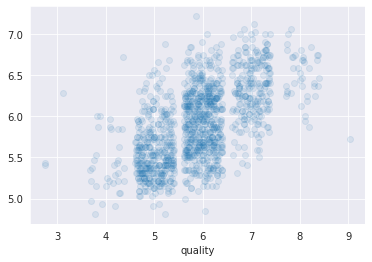

In [12]:
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.regplot(x=yw_test, y=yw_knn, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(yw_test, yw_knn)
r2_score(yw_test, yw_knn)

0.34775777963702226

#### 전처리

In [0]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
xw_train_std = stand.fit_transform(xw_train)  # 훈련용 데이터를 표준화한다
xw_test_std = stand.transform(xw_test)  # 훈련용과 같은 방식으로 변환한다

#### kNN 재학습

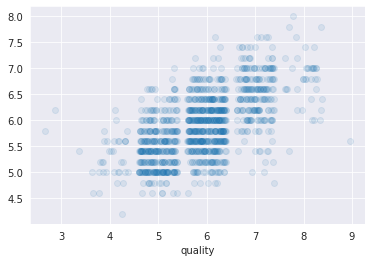

In [15]:
knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(xw_train_std, yw_train)
yw_knn2 = knn2.predict(xw_test_std)
sns.regplot(x=yw_test, y=yw_knn2, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})

In [16]:
r2_score(yw_test, yw_knn2)

0.35557786798459545

## Linear 모델
  * 각 변수에 일정한 가중치를 곱하여 총점을 구하는 방식으로 예측하는 방법

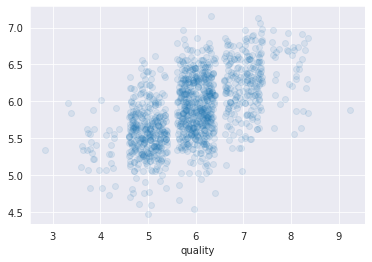

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xw_train, yw_train)
yw_lm = lm.predict(xw_test)
sns.regplot(x=yw_test, y=yw_lm, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})

In [18]:
r2_score(yw_test, yw_lm)

0.31036939191388724

#### 표준화된 데이터 적용

In [0]:
lm2 = LinearRegression()
lm2.fit(xw_train_std, yw_train)
yw_lm2 = lm2.predict(xw_test_std)

In [20]:
r2_score(yw_test, yw_lm2)

0.31036939191388735

## Decision Tree
  * 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습

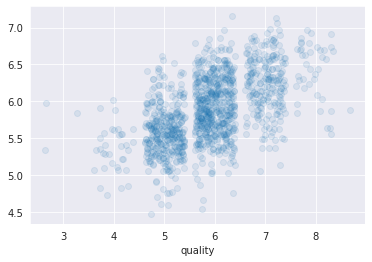

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(xw_train, yw_train)

yw_tree = tree.predict(xw_test)
sns.regplot(x=yw_test, y=yw_lm, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})

In [22]:
tree.score(xw_test, yw_test)

0.6106122448979592

#### RandomForest
  * 결정 트리의 주요 단점인 훈련 데이터의 과대적합 회피

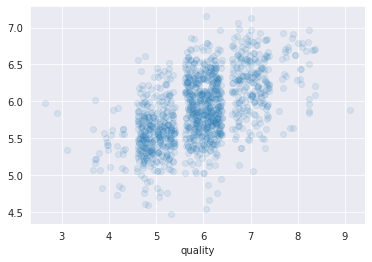

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

forest = RandomForestClassifier(random_state=2500)
forest.fit(xw_train, yw_train)

yw_forest = tree.predict(xw_test)
sns.regplot(x=yw_test, y=yw_lm, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})

In [24]:
forest.score(xw_test, yw_test)

0.68

## DNN 모델

In [0]:
'''
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# 정규화 tf.nn.batch_normalization(xw_train)
    
dnn = models.Sequential()
dnn.add(layers.Dense(units= 1024, input_dim = 784, activation='relu'))
dnn.add(layers.Dense(units= 512, activation='relu'))
dnn.add(layers.Dense(units= 256, activation='relu'))
dnn.add(layers.Dense(10, activation='softmax'))

#yw_dnn = dnn.predict(xw_test)

dnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
'''

In [0]:
#dnn.summary()

In [0]:
#dnn.fit(xw_train, yw_train, epochs=11, batch_size=512)

# **red wine**

## KNN 모델

0.4263623046875

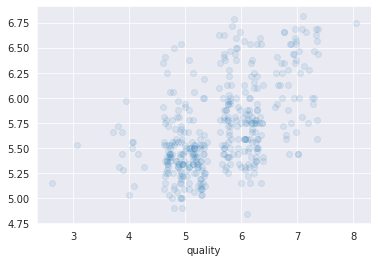

In [28]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=32)
knn.fit(xr_train, yr_train)

yr_knn = knn.predict(xr_test)

%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.regplot(x=yr_test, y=yr_knn, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})

from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(yr_test, yr_knn)

In [29]:
r2_score(yr_test, yr_knn)

0.3178134906349064

In [0]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
xr_train_std = stand.fit_transform(xr_train)  # 훈련용 데이터를 표준화한다
xr_test_std = stand.transform(xr_test)  # 훈련용과 같은 방식으로 변환한다

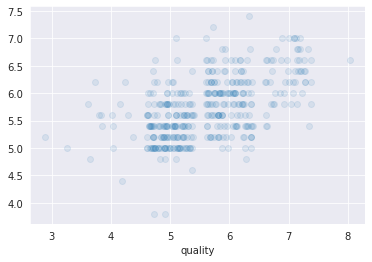

In [31]:
knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(xr_train_std, yr_train)
yr_knn2 = knn2.predict(xr_test_std)
sns.regplot(x=yr_test, y=yr_knn2, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})

## Linear 모델

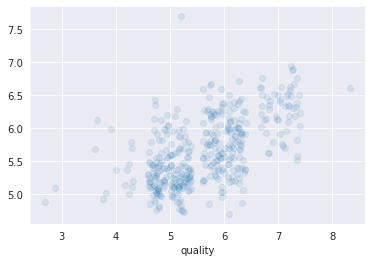

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xr_train, yr_train)
yr_lm = lm.predict(xr_test)
sns.regplot(x=yr_test, y=yr_lm, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})

In [33]:
r2_score(yr_test, yr_lm)

0.34890509125193936

In [34]:
lm2 = LinearRegression()
lm2.fit(xr_train_std, yr_train)
yr_lm2 = lm2.predict(xr_test_std)

r2_score(yr_test, yr_lm2)

0.34890509125193925

## DecisionTree 모델

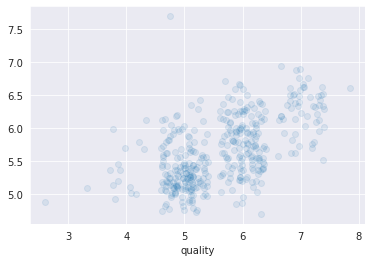

In [35]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(xr_train, yr_train)

yr_tree = tree.predict(xr_test)
sns.regplot(x=yr_test, y=yr_lm, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})

In [36]:
tree.score(xr_test, yr_test)

0.6

## RandomForest 모델

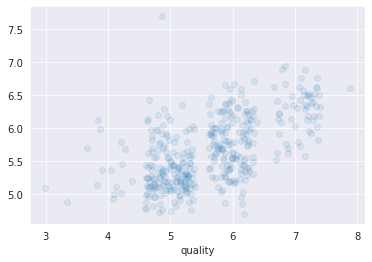

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

forest = RandomForestClassifier(random_state=2000)
forest.fit(xr_train, yr_train)

yr_forest = forest.predict(xr_test)
sns.regplot(x=yr_test, y=yr_lm, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})

In [38]:
forest.score(xr_test, yr_test)

0.7025

# 화이트 와인과 레드 와인을 하나의 모델만 사용하여 분류

## data 전처리

In [0]:
# 둘을 합쳐 하나의 프레임으로 만든다

red_wine['color'] = 1
white_wine['color'] = 0
wine = pd.concat([red_wine, white_wine])

In [0]:
x = wine[red_wine.columns.difference(['quality'])]
y = wine['quality']

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1234)

## KNN

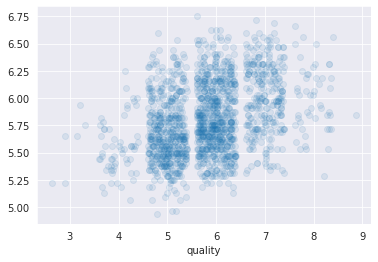

In [42]:
knn.fit(x_train, y_train)
y_knn = knn.predict(x_test)

%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.regplot(x=y_test, y=y_knn, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, y_knn)

0.6657319711538462

In [44]:
r2_score(y_test, y_knn)

0.13713967343454747

## Linear 모델

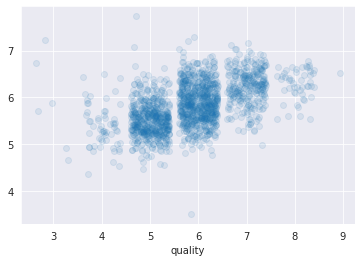

In [45]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
y_lm = lm.predict(x_test)
sns.regplot(x=y_test, y=y_lm, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})

In [46]:
r2_score(y_test, y_lm)

0.286216986972205

## Logistic 회귀

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_lr = lr.predict(x_test)
confusion_matrix(y_test, y_lr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[  0,   0,   2,   3,   0,   1,   0],
       [  0,   0,  24,  34,   0,   0,   0],
       [  0,   0, 229, 297,   2,   0,   0],
       [  0,   0, 159, 540,   4,   0,   0],
       [  0,   0,  40, 233,   6,   0,   0],
       [  0,   0,   6,  43,   1,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0]])

In [48]:
accuracy_score(y_test, y_lr)

0.47692307692307695

## Decision Tree

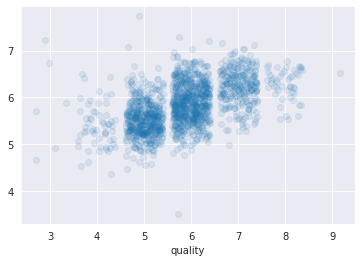

In [49]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)

y_tree = tree.predict(x_test)
sns.regplot(x=y_test, y=y_lm, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})

In [50]:
tree.score(x_test, y_test)

0.5913846153846154

## RandomForest 

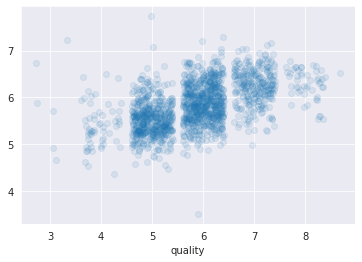

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

forest = RandomForestClassifier(random_state=2000)
forest.fit(x_train, y_train)

y_forest = forest.predict(x_test)
sns.regplot(x=y_test, y=y_lm, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})

In [52]:
forest.score(x_test, y_test)

0.6621538461538462